In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from salishsea_tools import viz_tools
from scipy.spatial import KDTree
import cmocean as cm
from pathlib import Path
import scipy

### Import data

In [2]:
mesh_ssc = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/mesh_mask201702MD.nc')
mesh_sss150bc = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/mesh_mask201702MD_No_FR_Ext.nc')
mesh_sss150 = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/bathymetry_southsalishsea150_update202108210102AUM1.nc')

In [3]:
tmask_ssc = 1 - mesh_ssc.tmask[0]
tmask_sss150bc = 1 - mesh_sss150bc.tmask[0]

### Check grid refinements

In [5]:
coords_paths = {
    "sss150": '/ocean/cstang/MOAD/analysis-camryn/OAE/sss150/coordinates_southsalishsea150_20210709.nc',
}

In [6]:
pnw_coast_paths = {
    "coastline": Path("/ocean/rich/more/mmapbase/bcgeo/PNW.mat"),
    "rivers": Path("/ocean/rich/more/mmapbase/bcgeo/PNWrivers.mat"),
}

In [7]:
scipy.io.loadmat(pnw_coast_paths["coastline"]);

In [8]:
coastline = scipy.io.loadmat(pnw_coast_paths["coastline"])["ncst"]

In [9]:
scipy.io.loadmat(pnw_coast_paths["rivers"]);

In [10]:
rivers = scipy.io.loadmat(pnw_coast_paths["rivers"])["ncst"]

#### Look @ warping

Text(0.5, 0, 'Longitude (°E)')

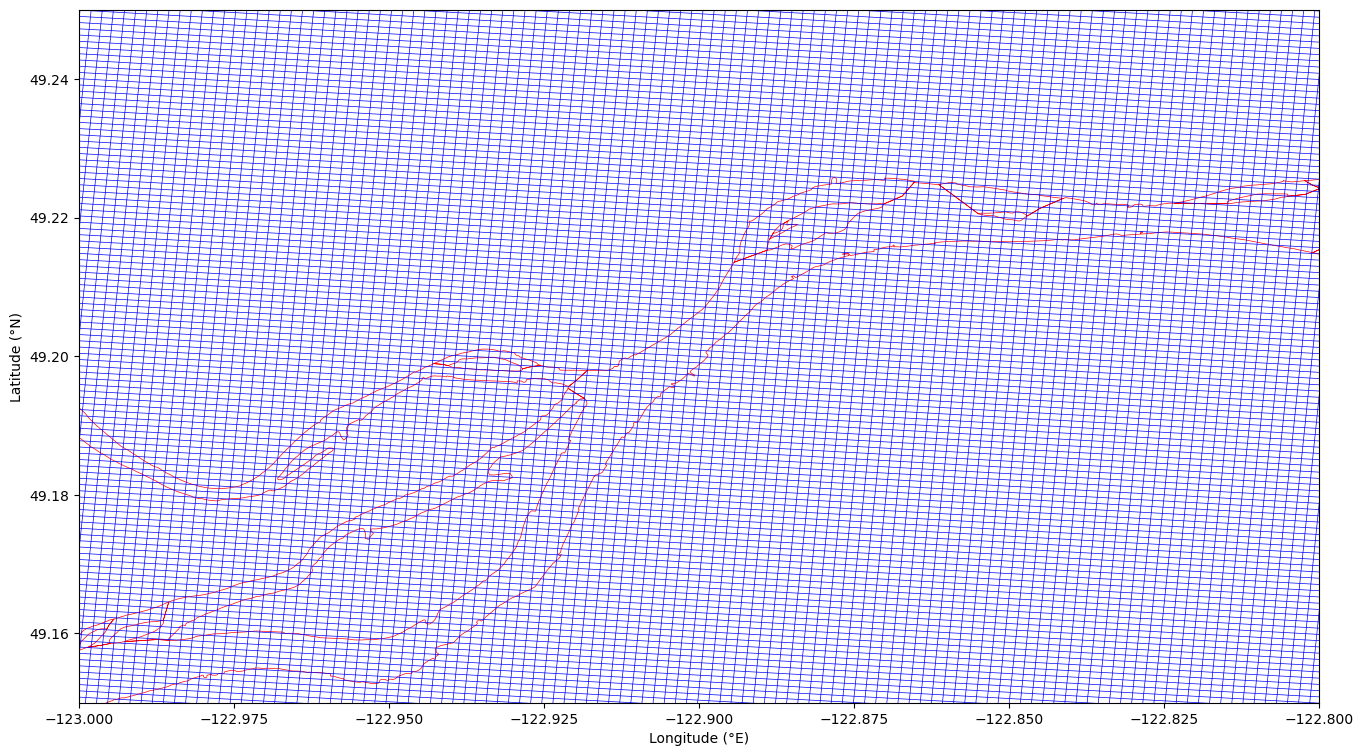

In [12]:
sss150_coords = xr.open_dataset(coords_paths["sss150"])

glamf, gphif = sss150_coords.glamf, sss150_coords.gphif

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.plot(coastline[:, 0], coastline[:, 1], color="red", linewidth=0.5)
ax.plot(rivers[:, 0], rivers[:, 1], color="red", linewidth=0.5)

# sss150 domain boundaries
ax.plot(glamf[0, :], gphif[0, :], color="black")  # south
ax.plot(glamf[:, 0], gphif[:, 0], color="black")  # west
ax.plot(glamf[-1, :], gphif[-1, :], color="black")  # north
ax.plot(glamf[:, -1], gphif[:, -1], color="black")  # east

ax.plot(glamf[100:,:], gphif[100:,:], color="blue", linewidth=0.5)
for row in range(100,826):
    ax.plot(glamf[row,:], gphif[row,:], color="blue", linewidth=0.5)

# # New Westminster area
ax.set_xlim(-123.0, -122.8)
ax.set_ylim(49.15, 49.25)
ax.set_ylabel('Latitude (°N)')
ax.set_xlabel('Longitude (°E)')
# Vancouver Harbour
# ax.set_xlim(-123.3, -122.80)
# ax.set_ylim(49.25, 49.45)

Doesn't look like there is any warping / stretching

#### Look @ HRDPS domain

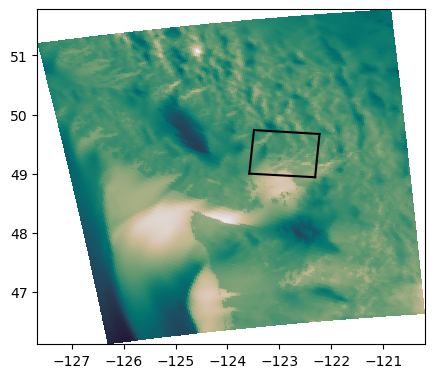

In [27]:
ds = xr.open_dataset('/results/forcing/atmospheric/continental2.5/nemo_forcing/hrdps_y2023m02d23.nc')

fig,ax = plt.subplots(1, 1, figsize=(5, 7))
ax.pcolormesh(ds.nav_lon.values-360,ds.nav_lat,ds.u_wind[0],cmap=cm.cm.rain)
viz_tools.set_aspect(ax);

# sss150 domain boundaries
ax.plot(glamf[0, :], gphif[0, :], color="black")  # south
ax.plot(glamf[:, 0], gphif[:, 0], color="black")  # west
ax.plot(glamf[-1, :], gphif[-1, :], color="black")  # north
ax.plot(glamf[:, -1], gphif[:, -1], color="black")  # east